In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot

Using TensorFlow backend.


In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [4]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
dfn = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\AMD.csv')
df = pd.read_csv( 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\INTEL.csv')

FileNotFoundError: [Errno 2] File b'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\AMD.csv' does not exist: b'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Transfer Learning\\Intel-To-ARM\\AMD.csv'

In [ ]:
df.head()

In [ ]:
dfn.head()

In [ ]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

In [20]:
len(df),len(dfn)

(1440, 570)

In [21]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [22]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [23]:
encoded_data_frame.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,power
0,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,1000,584,5.56428
1,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,2000,1230,5.70416
2,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,3000,1929,5.63798
3,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,4000,2653,5.61658
4,IntelCorei36100U_DDR41866_2GB,2.3,1,8,64,1,32,4,64,1,...,3,2,1,0,0,1866,2,5000,3409,5.58136


In [24]:
encoded_data_frame_n.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,...,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpus,PS,runtime,power
0,AdvMicDevBuldzrFX4100_DDR31866_2GB,3.6,1,4,64,1,16,16,64,1,...,4,4,2,1,0,1866,4,1000,419,1.06413
1,AdvMicDevBuldzrFX4100_DDR31866_2GB,3.6,1,4,64,1,16,16,64,1,...,4,4,2,1,0,1866,4,2000,866,1.08300
2,AdvMicDevBuldzrFX4100_DDR31866_2GB,3.6,1,4,64,1,16,16,64,1,...,4,4,2,1,0,1866,4,3000,1318,1.09014
3,AdvMicDevBuldzrFX4100_DDR31866_2GB,3.6,1,4,64,1,16,16,64,1,...,4,4,2,1,0,1866,4,4000,1775,1.09561
4,AdvMicDevBuldzrFX4100_DDR31866_2GB,3.6,1,4,64,1,16,16,64,1,...,4,4,2,1,0,1866,4,5000,2249,1.09723


In [25]:
encoded_data_frame.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'power'],
      dtype='object')

In [26]:
encoded_data_frame_n.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem_clock', 'num-cpus', 'PS', 'runtime', 'power'],
      dtype='object')

In [29]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2' ])

In [30]:
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3'])

In [31]:
total_data.columns, total_data_n.columns

(Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'PS', 'runtime', 'power'],
       dtype='object'),
 Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem_clock', 'num-cpus',
        'PS', 'runtime', 'power'],
       dtype='object'))

In [32]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [33]:
X_Intel = total_data.drop(columns = ['runtime','power']).to_numpy()
Y_Intel = total_data[['runtime','power']].to_numpy()

In [34]:
X_ARM = total_data_n.drop(columns = ['runtime','power']).to_numpy()
Y_ARM = total_data_n[['runtime','power']].to_numpy()

In [35]:
X_Intel.shape, X_ARM.shape, Y_Intel.shape, Y_ARM.shape

((1440, 18), (570, 18), (1440, 2), (570, 2))

In [36]:
Y_Intel[:10], Y_ARM[:10] 

(array([[ 584.     ,    5.56428],
        [1230.     ,    5.70416],
        [1929.     ,    5.63798],
        [2653.     ,    5.61658],
        [3409.     ,    5.58136],
        [3902.     ,    5.51593],
        [ 584.     ,    5.56428],
        [1230.     ,    5.70416],
        [1929.     ,    5.63798],
        [2653.     ,    5.61658]]), array([[4.19000e+02, 1.06413e+00],
        [8.66000e+02, 1.08300e+00],
        [1.31800e+03, 1.09014e+00],
        [1.77500e+03, 1.09561e+00],
        [2.24900e+03, 1.09723e+00],
        [2.57800e+03, 1.09313e+00],
        [4.19000e+02, 1.06413e+00],
        [8.66000e+02, 1.08300e+00],
        [1.31800e+03, 1.09014e+00],
        [1.77500e+03, 1.09561e+00]]))

In [37]:
# Separating ARM data to 1% and 99%
X_train_ARM, X_test_ARM, Y_train_ARM, Y_test_ARM = train_test_split(X_ARM, Y_ARM, test_size = 0.99, random_state=42)
print(X_train_ARM.shape, X_test_ARM.shape, Y_train_ARM.shape, Y_test_ARM.shape)
X_train_Intel = np.append(X_Intel, X_train_ARM,axis = 0)
Y_train_Intel = np.append(Y_Intel, Y_train_ARM,axis = 0)
print(X_train_Intel.shape, Y_train_Intel.shape, X_test_ARM.shape, Y_test_ARM.shape)

(5, 18) (565, 18) (5, 2) (565, 2)
(1445, 18) (1445, 2) (565, 18) (565, 2)


In [38]:
scaler_x = StandardScaler()
X_Intel = scaler_x.fit_transform(X_Intel)
X_train_ARM = scaler_x.fit_transform(X_train_ARM)
X_test_ARM = scaler_x.fit_transform(X_test_ARM)
scaler_y = StandardScaler()
# Y_Intel = np.reshape(Y_Intel, (len(Y_Intel),1))
# Y_test_ARM = np.reshape(Y_test_ARM, (len(Y_test_ARM),1))
# Y_train_ARM = np.reshape(Y_train_ARM, (len(Y_train_ARM),1))
Y_Intel = scaler_y.fit_transform(Y_Intel)
Y_test_ARM = scaler_y.fit_transform(Y_test_ARM)
Y_train_ARM = scaler_y.fit_transform(Y_train_ARM)
print(X_Intel.shape, Y_Intel.shape, X_train_ARM.shape, Y_train_ARM.shape, X_test_ARM.shape, Y_test_ARM.shape)

(1440, 18) (1440, 2) (5, 18) (5, 2) (565, 18) (565, 2)


In [39]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

In [3]:
dnn_2 = Sequential()
dnn_2.add(Dense(64, input_dim = 18, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(2, activation='linear'))
print('Model : DNN 2', dnn_2.summary())
plot_model(dnn_2, show_shapes = True, to_file = 'dnn.png')

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [44]:
dnn_2.compile(loss='mae', optimizer='adam', metrics=['mae'])
dnn_2.fit(X_Intel, Y_Intel, epochs = 100, batch_size = 10, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 0.2867 - mae: 0.2867
Epoch 2/100
 - 0s - loss: 0.0745 - mae: 0.0745
Epoch 3/100
 - 0s - loss: 0.0547 - mae: 0.0547
Epoch 4/100
 - 0s - loss: 0.0489 - mae: 0.0489
Epoch 5/100
 - 0s - loss: 0.0494 - mae: 0.0494
Epoch 6/100
 - 0s - loss: 0.0428 - mae: 0.0428
Epoch 7/100
 - 0s - loss: 0.0432 - mae: 0.0432
Epoch 8/100
 - 0s - loss: 0.0376 - mae: 0.0376
Epoch 9/100
 - 0s - loss: 0.0351 - mae: 0.0351
Epoch 10/100
 - 0s - loss: 0.0348 - mae: 0.0348
Epoch 11/100
 - 0s - loss: 0.0349 - mae: 0.0349
Epoch 12/100
 - 0s - loss: 0.0336 - mae: 0.0336
Epoch 13/100
 - 0s - loss: 0.0326 - mae: 0.0326
Epoch 14/100
 - 0s - loss: 0.0329 - mae: 0.0329
Epoch 15/100
 - 0s - loss: 0.0302 - mae: 0.0302
Epoch 16/100
 - 0s - loss: 0.0315 - mae: 0.0315
Epoch 17/100
 - 0s - loss: 0.0315 - mae: 0.0315
Epoch 18/100
 - 0s - loss: 0.0320 - mae: 0.0320
Epoch 19/100
 - 0s - loss: 0.0285 - mae: 0.0285
Epoch 20/100
 - 0s - loss: 0.0300 - mae: 0.0300
E

In [45]:
# Freeze the layers except the last 2 dense layers
for layer in dnn_2.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in dnn_2.layers:
    print(layer, layer.trainable)

<keras.layers.core.Dense object at 0x000000278A5BEB00> False
<keras.layers.core.Dense object at 0x000000278A5BEB70> False
<keras.layers.core.Dense object at 0x000000278A5BEDA0> True
<keras.layers.core.Dense object at 0x000000278A74CD30> True


In [52]:
dnn_2.fit(X_train_ARM, Y_train_ARM, epochs = 100, batch_size = 1, verbose = 2)

C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/100
 - 0s - loss: 0.0444 - mae: 0.0444
Epoch 2/100
 - 0s - loss: 0.0540 - mae: 0.0540
Epoch 3/100
 - 0s - loss: 0.0442 - mae: 0.0442
Epoch 4/100
 - 0s - loss: 0.0622 - mae: 0.0622
Epoch 5/100
 - 0s - loss: 0.0394 - mae: 0.0394
Epoch 6/100
 - 0s - loss: 0.0528 - mae: 0.0528
Epoch 7/100
 - 0s - loss: 0.0666 - mae: 0.0666
Epoch 8/100
 - 0s - loss: 0.0552 - mae: 0.0552
Epoch 9/100
 - 0s - loss: 0.0344 - mae: 0.0344
Epoch 10/100
 - 0s - loss: 0.0384 - mae: 0.0384
Epoch 11/100
 - 0s - loss: 0.0213 - mae: 0.0213
Epoch 12/100
 - 0s - loss: 0.0395 - mae: 0.0395
Epoch 13/100
 - 0s - loss: 0.0407 - mae: 0.0407
Epoch 14/100
 - 0s - loss: 0.0573 - mae: 0.0573
Epoch 15/100
 - 0s - loss: 0.0441 - mae: 0.0441
Epoch 16/100
 - 0s - loss: 0.0379 - mae: 0.0379
Epoch 17/100
 - 0s - loss: 0.0506 - mae: 0.0506
Epoch 18/100
 - 0s - loss: 0.0527 - mae: 0.0527
Epoch 19/100
 - 0s - loss: 0.0297 - mae: 0.0297
Epoch 20/100
 - 0s - loss: 0.0416 - mae: 0.0416
Epoch 21/100
 - 0s - loss: 0.0432 - mae: 0.0432
E

In [54]:
Y_pred = dnn_2.predict(X_test_ARM)

In [55]:
pickle.dump(dnn_2, open('dnn_model_Intel_to_AMD', 'wb'))

MSE: 
 69594.00922263747

R2: 
 0.7846142115142133

MAPE Runtime: 
 0.20452351084331152

MAPE Power: 
 0.08982029470985348


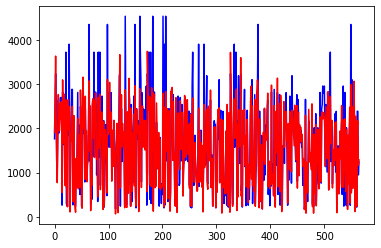

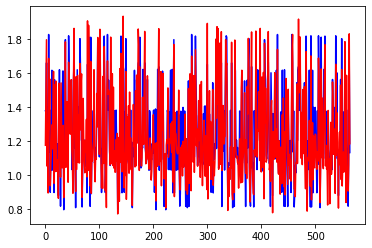

In [56]:
Y_fold = scaler_y.inverse_transform(Y_test_ARM)
Y_pred = scaler_y.inverse_transform(Y_pred)
plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE Runtime: \n', mape_scores_runtime)
print('\nMAPE Power: \n', mape_scores_power)